# Portfolio Generator
Uses the implementation in the `.py` files to generate portfolios

In [1]:
import pandas as pd
import yfinance as yf

import MVO
import utils

## Initialize Data

In [2]:
# CONSTANTS: TICKERS
NASDAQ_100 = open('data/nasdaq100.txt', 'r').read().split('\n')
DOW_JONES_30 = open('data/dj30.txt', 'r').read().split('\n')

NSDQ_INDEX = '^NDX'
DJ_INDEX = '^DJI'

In [3]:
# CONSTANTS: DATE
HIST_START = '2000-01-01'
HIST_END = '2024-01-01'

TRAIN_START = '2017-01-01'
TRAIN_END = '2018-01-01'

TEST_START = '2000-01-01'
TEST_END = '2024-01-01'

In [4]:
# CONSTANTS: DATA
MARKET_FF_HIST = pd.read_csv('data/ff_daily.csv')

NSDQ100_HIST = yf.download(NASDAQ_100, start = HIST_START, end = HIST_END, auto_adjust=True)
DJ30_HIST = yf.download(DOW_JONES_30, start = HIST_START, end = HIST_END, auto_adjust=True)

NSDQ_INDEX_HIST = yf.download([NSDQ_INDEX], start = HIST_START, end = HIST_END, auto_adjust=True)
DJ_INDEX_HIST = yf.download([DJ_INDEX], start = HIST_START, end = HIST_END, auto_adjust=True)

[*********************100%%**********************]  101 of 101 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Testing on Data

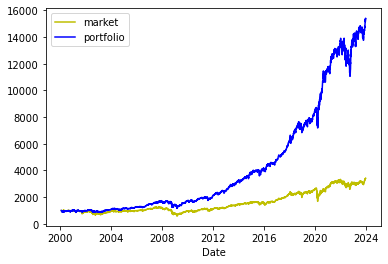

In [5]:
plot = utils.MVOPlot(MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 1), HIST_END),
                     MVO.Portfolio(DJ_INDEX_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 1), HIST_END))
# Ensure no look ahead bias
lagged_weights = None
for (s,e) in utils.daterange(HIST_START, HIST_END, interval="m"):
  risk_free_reference = MVO.Market(MARKET_FF_HIST, s, e)
  portfolio = MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, s, e)
  mvo = MVO.MVO(portfolio)
  mvo.minimum_variance()
  if lagged_weights is not None:
    plot.add_returns(s, e, lagged_weights)
  lagged_weights = mvo.stats['Weights']
plot.plot()

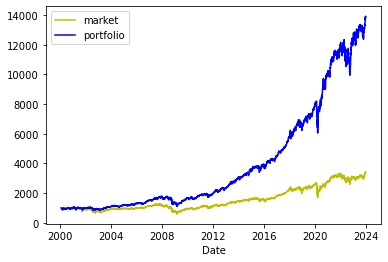

In [9]:
plot = utils.MVOPlot(MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 1), HIST_END),
                     MVO.Portfolio(DJ_INDEX_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 1), HIST_END))
# Ensure no look ahead bias
lagged_weights = None
for (s,e) in utils.daterange(HIST_START, HIST_END, interval="m"):
  risk_free_reference = MVO.Market(MARKET_FF_HIST, s, e)
  portfolio = MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, s, e)
  # Only-long portfolio
  mvo = MVO.MVO(portfolio, [[0, 1] for _ in range(len(DOW_JONES_30))])
  mvo.minimum_variance()
  if lagged_weights is not None:
    plot.add_returns(s, e, lagged_weights)
  lagged_weights = mvo.stats['Weights']
plot.plot()

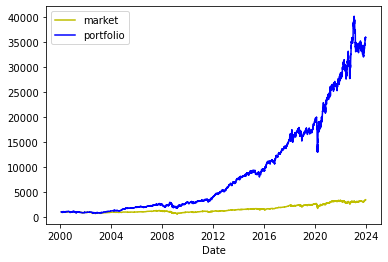

In [10]:
plot = utils.MVOPlot(MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 1), HIST_END),
                     MVO.Portfolio(DJ_INDEX_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 1), HIST_END))
# Ensure no look ahead bias
lagged_weights = None
for (s,e) in utils.daterange(HIST_START, HIST_END, interval="m"):
  risk_free_reference = MVO.Market(MARKET_FF_HIST, s, e)
  portfolio = MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, s, e)
  mvo = MVO.MVO(portfolio, [[0, 1] for _ in range(len(DOW_JONES_30))])
  # Use sharpe ratio instead using FF3 as reference
  mvo.maximum_sharpe(risk_free_reference.risk_free_rate)
  if lagged_weights is not None:
    plot.add_returns(s, e, lagged_weights)
  lagged_weights = mvo.stats['Weights']
plot.plot()

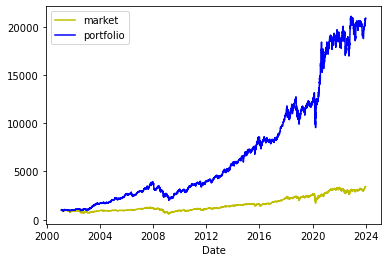

In [11]:
plot = utils.MVOPlot(MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 13), HIST_END),
                     MVO.Portfolio(DJ_INDEX_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 13), HIST_END))
# Ensure no look ahead bias
lagged_weights = None
for (s,e) in utils.daterange(utils.dateadd(HIST_START, "y", 1), HIST_END, interval="m"):
  risk_free_reference = MVO.Market(MARKET_FF_HIST, s, e)
  # Use 1 year worth of data to align better with theory
  portfolio = MVO.Portfolio(DJ30_HIST, MARKET_FF_HIST, utils.dateadd(s, "m", -11), e)
  mvo = MVO.MVO(portfolio, [[0, 1] for _ in range(len(DOW_JONES_30))])
  mvo.maximum_sharpe(risk_free_reference.risk_free_rate)
  if lagged_weights is not None:
    plot.add_returns(s, e, lagged_weights)
  lagged_weights = mvo.stats['Weights']
plot.plot()

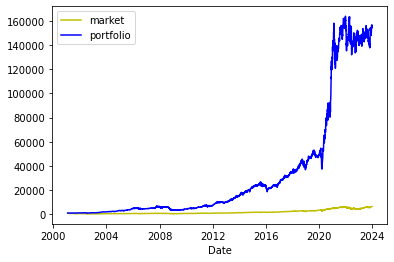

In [12]:
# Back test on NSDQ 100 as well
plot = utils.MVOPlot(MVO.Portfolio(NSDQ100_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 13), HIST_END),
                     MVO.Portfolio(NSDQ_INDEX_HIST, MARKET_FF_HIST, utils.dateadd(HIST_START, "m", 13), HIST_END))
# Ensure no look ahead bias
lagged_weights = None
for (s,e) in utils.daterange(utils.dateadd(HIST_START, "y", 1), HIST_END, interval="m"):
  risk_free_reference = MVO.Market(MARKET_FF_HIST, s, e)
  portfolio = MVO.Portfolio(NSDQ100_HIST, MARKET_FF_HIST, utils.dateadd(s, "m", -11), e)
  mvo = MVO.MVO(portfolio, [[0, 1] for _ in range(len(NASDAQ_100))])
  mvo.maximum_sharpe(risk_free_reference.risk_free_rate)
  if lagged_weights is not None:
    plot.add_returns(s, e, lagged_weights)
  lagged_weights = mvo.stats['Weights']
plot.plot()